In [2]:
from immsim import immsim
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 

# Scénario ISQ 

In [3]:
isq = immsim()
isq.set_npr_policy(entry_cap = 450e3, renewal_rate = 0)
isq.set_imm_policy(entry_cap = 65e3, accept_rate = 0)
isq.proj(2025)

In [4]:
90e3/isq.npr.loc[2023,:].sum()

0.19109253974724827

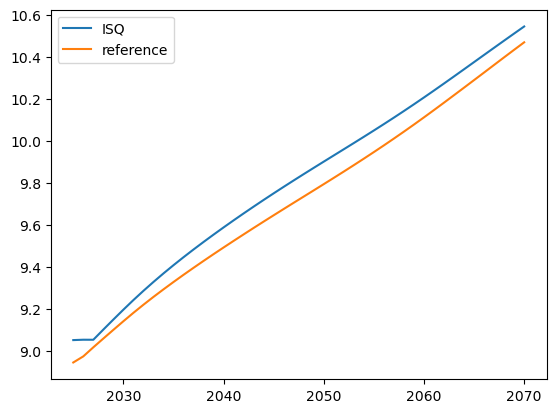

In [5]:
plt.figure()
plt.plot(isq.pop.loc[2025:,:].sum(axis=1)*1e-6,label='ISQ')
plt.plot(isq.pop_sim.loc[2025:,:].sum(axis=1)*1e-6,label='reference')
plt.legend()
plt.show()

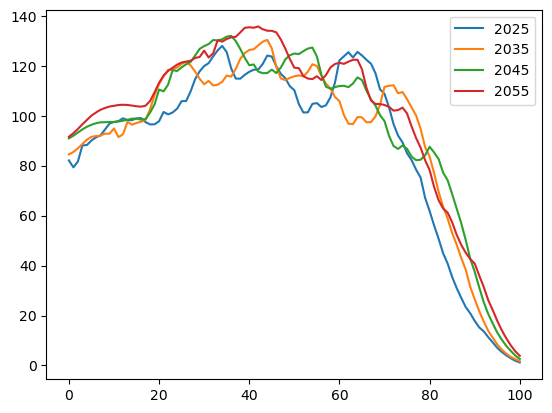

In [6]:
plt.figure()
for tt in [2025,2035,2045,2055]:
    plt.plot(isq.pop.columns,isq.pop_sim.loc[tt,:]*1e-3,label=str(tt))
plt.legend()
plt.show()

# Contre-factuel sans immigration



In [7]:
isq = immsim()
isq.set_npr_policy(entry_cap = 450e3, renewal_rate = 0)
isq.set_imm_policy(entry_cap = 0, accept_rate = 0)
isq.proj(2025)

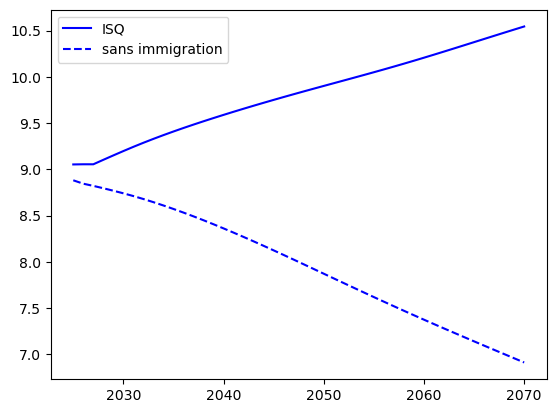

In [8]:
plt.figure()
plt.plot(isq.pop.loc[2025:,:].sum(axis=1)*1e-6,label='ISQ',color='blue')
plt.plot(isq.pop_sim.loc[2025:,:].sum(axis=1)*1e-6,label='sans immigration',color='blue',linestyle='--')
plt.legend()
plt.savefig('../Figures/no_immig.png',dpi=1200)
plt.show()

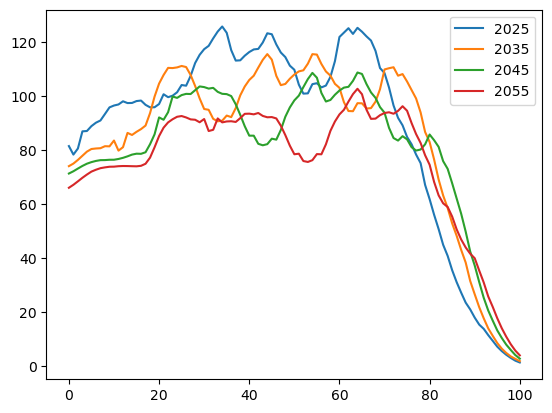

In [9]:
plt.figure()
for tt in [2025,2035,2045,2055]:
    plt.plot(isq.pop.columns,isq.pop_sim.loc[tt,:]*1e-3,label=str(tt))
plt.legend()
plt.show()

In [10]:
dep_rates_sim = []
dep_rates = []
work_rates = []
work_rates_sim = []
for tt in np.arange(2025,2070):
    dep = isq.pop_sim.loc[tt,65:].sum() + isq.pop_sim.loc[tt,:20].sum()
    work = isq.pop_sim.loc[tt,15:65].sum() 
    work_rates_sim.append(work/isq.pop.loc[tt,:].sum())
    dep_rates_sim.append(dep/work)
    dep = isq.pop.loc[tt,65:].sum() + isq.pop.loc[tt,:20].sum()
    work = isq.pop.loc[tt,15:65].sum() 
    work_rates.append(work/isq.pop.loc[tt,:].sum())
    dep_rates.append(dep/work)


In [11]:
7/1000 * 9e6

63000.0

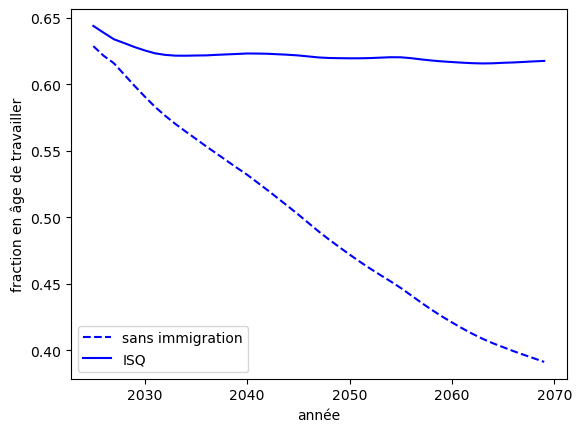

In [12]:
plt.figure()
plt.plot(np.arange(2025,2070),work_rates_sim,label='sans immigration',color='blue',linestyle='--')
plt.plot(np.arange(2025,2070),work_rates,label='ISQ',color='blue')
plt.xlabel('année')
plt.ylabel('fraction en âge de travailler')
plt.savefig('../Figures/lfp_ratio.png',dpi=1200)
plt.legend()
plt.show()

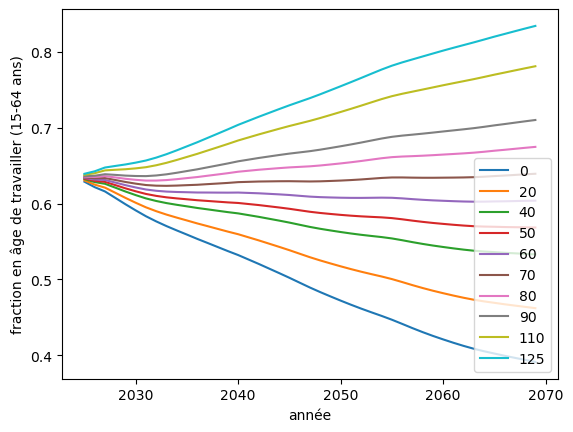

In [13]:
levels = [0,20e3,40e3,50e3,60e3,70e3,80e3,90e3,110e3,125e3]
years = [2025,2030,2040,2050,2060,2069]
results = pd.DataFrame(index=years,columns=levels,dtype='float64')
plt.figure()
for l in levels:
    isq = immsim()
    isq.set_npr_policy(entry_cap = 450e3, renewal_rate = 0)
    isq.set_imm_policy(entry_cap = l, accept_rate = 0)
    isq.proj(2025)
    work_rates_sim = []
    for tt in np.arange(2025,2070):
        work = isq.pop_sim.loc[tt,15:65].sum() 
        work_rates_sim.append(work/isq.pop.loc[tt,:].sum())
        if tt in years:
            results.loc[tt,l] = work/isq.pop.loc[tt,:].sum()
    plt.plot(np.arange(2025,2070),work_rates_sim,label=str(int(np.round(l*1e-3,0))))
plt.xlabel('année')
plt.ylabel('fraction en âge de travailler (15-64 ans)')
plt.legend()
plt.savefig('../Figures/lfp_ratio_immig.png',dpi=1200)
plt.show()

In [14]:
rates = results.copy()
cum_rates = results.copy()
gr_tfp = 0.01

In [15]:
for i in years[1:]:
    for j in results.columns:
        rates.loc[i,j] = (results.loc[i,j]/results.loc[2025,j])**(1/(i-2025))-1
        cum_rates.loc[i,j] = (results.loc[i,j]/results.loc[2025,j])-1 + ((1+gr_tfp)**(i-2025) - 1)
rates.loc[2025,:] = 0
cum_rates.loc[2025,:] = 0

In [16]:
rates

,0.0,20000.0,40000.0,50000.0,60000.0,70000.0,80000.0,90000.0,110000.0,125000.0
2025,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2030,-0.012325,-0.009507,-0.006735,-0.005366,-0.004008,-0.002661,-0.001324,0.000001,0.002622,0.004560
2040,-0.011072,-0.007923,-0.004924,-0.003476,-0.002061,-0.000677,0.000678,0.002003,0.004573,0.006433
2050,-0.011407,-0.007887,-0.004660,-0.003142,-0.001682,-0.000274,0.001084,0.002395,0.004892,0.006663
2060,-0.011405,-0.007654,-0.004348,-0.002831,-0.001392,-0.000024,0.001280,0.002526,0.004860,0.006490
2069,-0.010730,-0.007038,-0.003872,-0.002443,-0.001100,0.000165,0.001363,0.002499,0.004609,0.006069


In [17]:
cum_rates.columns = [int(c*1e-3) for c in levels]

In [18]:
cum_rates = (cum_rates*100).round(1)

In [19]:
cum_rates.to_excel('../Figures/lfp_growth.xlsx')

In [20]:
init_pop_age = isq.pop_sim.loc[2025,:]/isq.pop_sim.loc[2025,:].sum()


In [21]:
pr_age = isq.share_ix.loc[2025,:]
npr_age = isq.share_npr.loc[2025,:]
ages = np.arange(0,100)


In [22]:
mean_pop_age = np.sum([p*a for p,a in zip(init_pop_age,ages)])
mean_pr_age = np.sum([p*a for p,a in zip(pr_age,ages)])
mean_npr_age = np.sum([p*a for p,a in zip(npr_age,ages)])



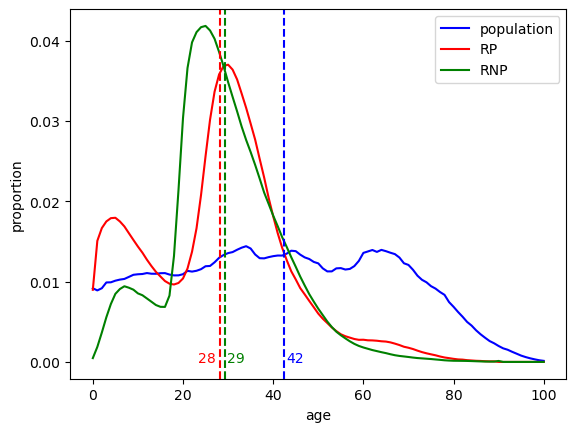

In [23]:
plt.figure()
plt.plot(init_pop_age,label='population',color='blue')
plt.plot(pr_age,label='RP',color='red')
plt.plot(npr_age,label='RNP',color='green')
plt.axvline(x=mean_pop_age,color='blue',linestyle='--')
plt.axvline(x=mean_pr_age,color='red',linestyle='--')
plt.axvline(x=mean_npr_age,color='green',linestyle='--')
plt.annotate(str(int(mean_pop_age.round(0))),(mean_pop_age+0.5,0.0),color='blue')
plt.annotate(str(int(mean_pr_age.round(0))),(mean_pr_age-5,0.0),color='red')
plt.annotate(str(int(mean_npr_age.round(0))),(mean_npr_age+0.5,0.0),color='green')
plt.xlabel('age')
plt.ylabel('proportion')
plt.legend()
plt.savefig('../Figures/age_dist.png',dpi=1200)
plt.show()


In [24]:
isq.

SyntaxError: invalid syntax (3281508262.py, line 1)

Si rien ne change 

In [6]:
ref = immsim()
ref.set_npr_policy(entry_cap = 150e3, renewal_rate = 0.88)
ref.set_imm_policy(entry_cap = 50e3, accept_rate = 0.06)
ref.proj(2025)

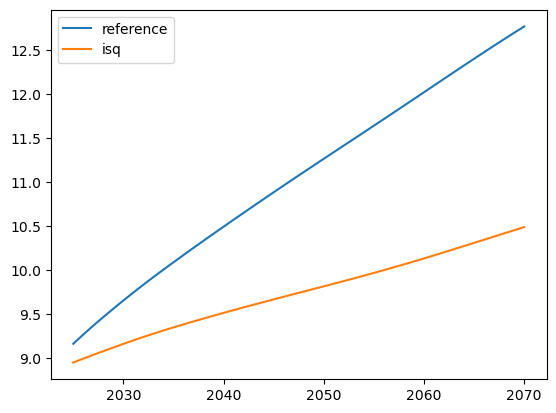

In [7]:
plt.figure()
plt.plot(ref.pop_sim.loc[2025:,:].sum(axis=1)*1e-6,label='reference')
plt.plot(isq.pop_sim.loc[2025:,:].sum(axis=1)*1e-6,label='isq')
plt.legend()
plt.show()

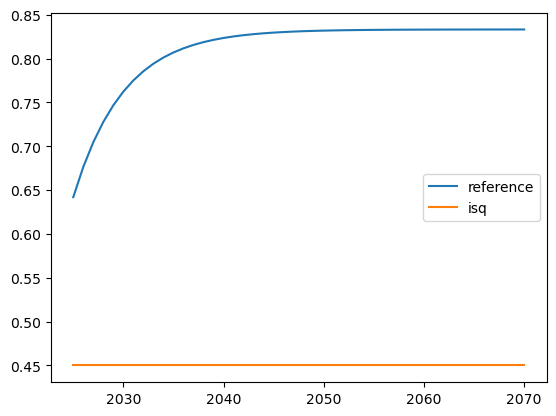

In [8]:
plt.figure()
plt.plot(ref.npr_sim.loc[2025:,:].sum(axis=1)*1e-6,label='reference')
plt.plot(isq.npr_sim.loc[2025:,:].sum(axis=1)*1e-6,label='isq')
plt.legend()
plt.show()

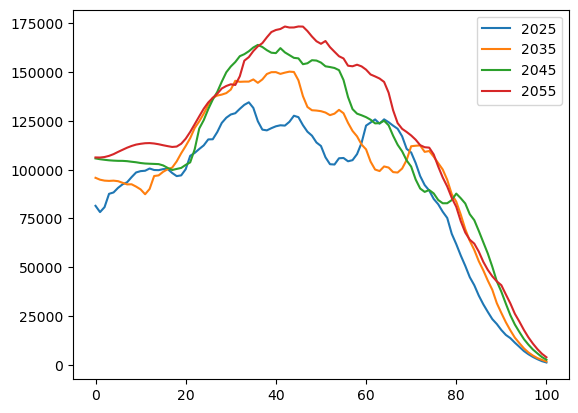

In [9]:
plt.figure()
for tt in [2025,2035,2045,2055]:
    plt.plot(ref.pop.columns,ref.pop_sim.loc[tt,:],label=str(tt))
plt.legend()
plt.show()

In [13]:
scn = immsim()
scn.set_npr_policy(entry_cap = 100e3, renewal_rate = 0.76)
scn.set_imm_policy(entry_cap = 65e3, accept_rate = 0.06)
scn.proj(2025)

In [11]:
scn = immsim()
scn.set_npr_policy(entry_cap = 50e3, renewal_rate = 0.75)
scn.set_imm_policy(entry_cap = 65e3, accept_rate = 0.1)
scn.proj(2025)

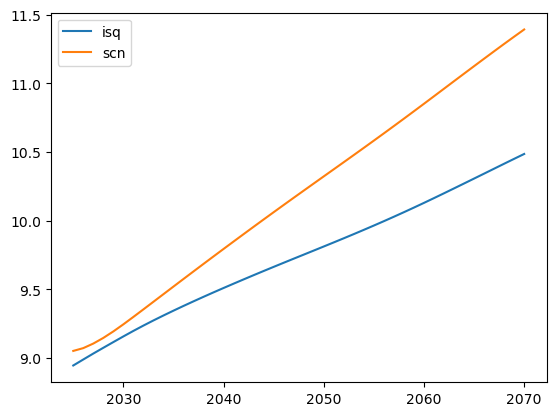

In [14]:
plt.figure()
plt.plot(isq.pop_sim.loc[2025:,:].sum(axis=1)*1e-6,label='isq')
plt.plot(scn.pop_sim.loc[2025:,:].sum(axis=1)*1e-6,label='scn')
plt.legend()
plt.show()

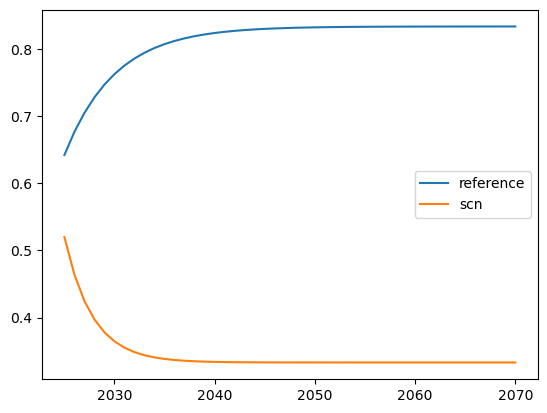

In [35]:
plt.figure()
plt.plot(ref.npr_sim.loc[2025:,:].sum(axis=1)*1e-6,label='reference')
plt.plot(scn.npr_sim.loc[2025:,:].sum(axis=1)*1e-6,label='scn')
plt.legend()
plt.show()

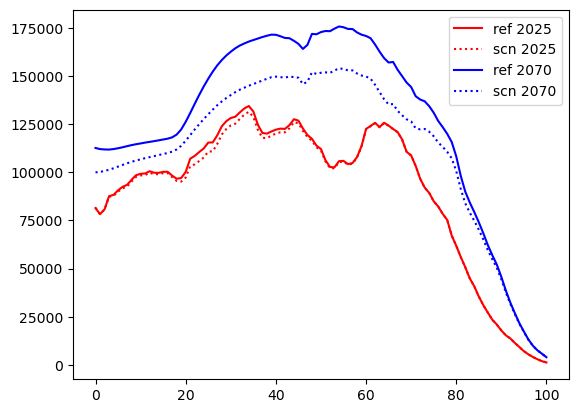

In [15]:
plt.figure()
colors = ['red','blue']
for i,tt in enumerate([2025,2070]):
    plt.plot(ref.pop.columns,ref.pop_sim.loc[tt,:],label='ref '+str(tt),color=colors[i])
    plt.plot(scn.pop.columns,scn.pop_sim.loc[tt,:],label='scn '+str(tt),color=colors[i],linestyle='dotted')
plt.legend()
plt.show()

In [38]:
600e3/9e6

0.06666666666666667

In [39]:
isq.pop.loc[2024,:].sum()

9051663.0